%html
<style>
  .nbpresent_present h1 {font-size: 200%}
  p {font-size: 10px}
  li {font-size: 10px}
  CodeMirror-code {font-size: 200%}
</style>

# Introduction to Python testing and documentation

### Mike Irvine
### University of British Columbia
### British Columbia Centre for Disease Control
m.irvine@math.ubc.ca

[sempwn.github.io](https://sempwn.github.io)

In [51]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
ts = np.arange(0,10,0.1)

In [65]:
import model as m
from numpy import array,arange
m = reload(m)


In [60]:
p = m.parameter_set(beta=1.0,gamma=0.4)
x0 = np.array([0.99,0.01])
T = 20

In [61]:
ts,result = m.simulate(p,x0,T=T,dt=0.01)

Create a package that solves an SIR type model

We'll need 
* An ODE solver.
* A way of importing and defining parameters.
* Specify the model.
* Something that ties all this together and simulates.

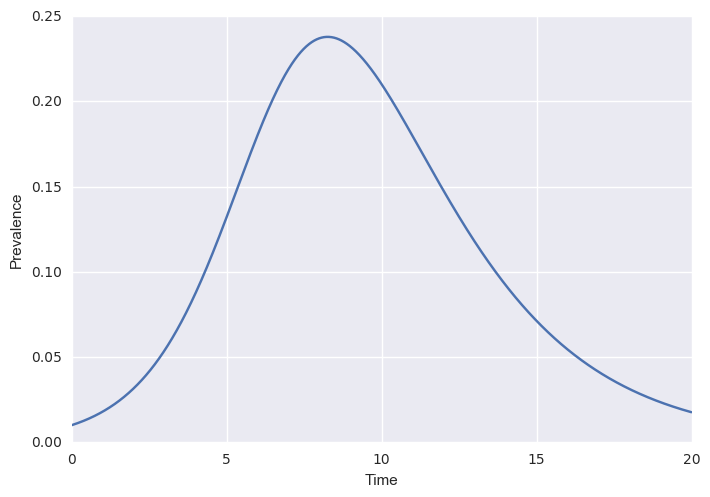

In [71]:
plt.plot(ts,result[:,1],label='susceptible');
plt.xlabel('Time');
plt.ylabel('Prevalence');


In [66]:
def stm(x0,T,dt,alpha,beta):
    ts = arange(0,T,dt)
    results = []
    x = x0
    for t in ts:
        S,I = x[0],x[1]
        dS = beta*S*I
        dI = beta*S*I - gamma*I
        dx = array([dS,dI])
        x = x + dt*dx
        results.append(x)
    return ts,array(results)

* What are all the parameters (is it obvious to someone else or myself in a years time)
* Does the function name make it clear what it does?
* What would happen if I accidently wrote `stm(x0,T,dt,beta,alpha)`
* What if I wanted to change the solver method?

Step 1: Split each component up into separate functions each with their own specific purpose

In [68]:
def left_hand_side(x,t,beta,gamma):
    S,I = x[0],x[1]
    dS = -beta*S*I
    dI = beta*S*I - gamma*I
    return np.array([dS,dI])

def euler_step(x,beta,gamma,t,dt):
    dx = left_hand_side(x,t,beta,gamma)
    return x + dt*dx

def simulate(beta,gamma,x0,T=10,dt=0.1):
    ts = np.arange(0,T,dt)
    results = []
    x = x0
    for t in ts:
        x = euler_step(x,beta,gamma,t,dt)
        results.append(x)

    return ts,np.array(results)

Step 2: (Python) Use a dictionary to contain parameters

In [ ]:
def left_hand_side(x,t,p):
    S,I = x[0],x[1]
    dS = -p['beta']*S*I
    dI = p['beta']*S*I - p['gamma']*I
    return np.array([dS,dI])

def euler_step(x,t,p,dt):
    dx = left_hand_side(x,t,beta,gamma)
    return x + dt*dx

def simulate(p,x0,T=10,dt=0.1):
    ts = np.arange(0,T,dt)
    results = []
    x = x0
    for t in ts:
        x = euler_step(x,beta,gamma,t,dt)
        results.append(x)

    return ts,np.array(results)

def parameter_set(beta=1.0,gamma=0.1):
    return {'beta':beta,'gamma':gamma}



Step 3: Add comments

In [69]:
"""
Model
-----

Python module for an example epidemiological model

Routine Listings
----------------

1. left_hand_side: function
2. euler_step: function
2. simulate: function
3. parameter_set: function
"""

# load libraries
import numpy as np

def left_hand_side(x,p,t):
    """
    Left-hand side of ODE equation

    Parameters
    ----------
        x : array
            current state
        p : dictionary
            parameters
        t : float
            current time

    Returns
    -------
    dx : array
        derivative of x wrt t
    """
    S,I = x[0],x[1]
    dS = -p['beta']*S*I
    dI = p['beta']*S*I - p['gamma']*I

    # return result as an array
    return np.array([dS,dI])

def euler_step(x,p,t,dt):
    """
    Euler step method for solving ODE.

    [Reference](https://en.wikipedia.org/wiki/Euler_method "Wikipedia page on Euler method")

    Parameters
    ----------
        x : array
            current state
        p : dictionary
            parameters
        t : float
            current time
        dt : float
            step-size

    Returns
    -------
    array
        state at time t + dt
    """
    dx = left_hand_side(x,p,t)
    return x + dt*dx

def simulate(p,x0,T=10,dt=0.1):
    """
    Solve ODE with initial values x0 up until time T.
    Parameters
    ----------

        p : dictionary
            parameters
        x0 : array
            initial state
        T : float
            final time to simulate until
        dt : float
            step-size

    Returns
    -------
    ts : array
        time-points for simulation
    array
        result of simulation
    """

    # get array of times to simulate at.
    ts = np.arange(0,T,dt)

    #initialise results list
    results = []
    x = x0
    for t in ts:
        x = euler_step(x,p,t,dt)
        results.append(x)

    return ts,np.array(results)

def parameter_set(beta=1.0,gamma=0.1):
    """
    Create parameter dictionary from list of parameters

    Parameters
    ----------
    beta : float
        infectivity

    gamma : float
        recovery rate

    Returns
    -------
    dictionary
        dictionary of parameters

    """

    return {'beta':beta,'gamma':gamma}


# Generating automated documentation
![img](./img/sphinxheader.png)
![img](./img/header-logo.png)

* [Sphinx](http://www.sphinx-doc.org/en/stable/tutorial.html) can automatically generate documentation for you
* Follow the [numpy docstring standard](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt)
* Can host them for free on [readthedocs.org](https://readthedocs.org)

To begin run:

`$ sphinx-quickstart`

Will need to customize the `conf.py` file to include the working directory and any extensions such as for the numpy docstring.

Open the newly created `index.rst` and add any sections you want.

```
Contents:

.. toctree::
   :maxdepth: 2

   introduction
   model
```

## See newly built docs

# Test driven development

![img](./img/tdd-circle-of-life.png)

Test-driven development:
* Idea is to start by writing a test that fails.
* Write a new feature.
* Re-run the test so that it passes.
* Re-run all other tests to make sure they pass as well.
* Refactor code

In [72]:
import numpy.testing as npt

In [73]:
def test_parameters_set():
    """
    Test that parameter set works correctly.

    """
    beta = 0.1
    gamma = 0.2
    p = model.parameter_set(beta=beta,gamma=gamma)

    npt.assert_equal(beta, p['beta'])
    npt.assert_equal(gamma, p['gamma'])

## Back to our module example

* Use `numpy.testing` to write tests.
* This test asserts that parameters are set correctly.
* Run from command line with `pytest`

Test model output size is correct

In [ ]:
def test_model_size():
    """
    Test that model gives correct dimensional output.
    """

    npt.assert_equal(ts.size,result[:,1].size)

    npt.assert_equal(2,result[0,:].size)

Test model values between zero and one

In [ ]:
def test_model_output_between_zero_and_one():
    """
    Test that model values between 0 and 1.
    """

    np.testing.assert_array_less(0.0, result)

    np.testing.assert_array_less(result, 1.0)

# Check out tests

More information:
* [github.com/uwescience/shablona](https://github.com/uwescience/shablona)
* [github.com/sempwn/python-document-test](https://github.com/sempwn/python-document-test)   

In [74]:
%%javascript
nbpresent.mode.tree.set(
    ["app", "theme-manager", "themes", "my-theme"], 
    {
    palette: {
        "my-blue": {
            id: "my-blue",
            rgb: [0, 0, 255]
        },
        "my-black": {
            id: "my-black",
            rgb: [0, 0, 0]
        }
    },
    backgrounds: {
        "my-background": {
            "background-color": "my-black"
        }
    },
    "text-base": {
        "font-family": "Anonymous Pro",
        "font-size": 5
    },
    rules: {
        h1: {
            "font-size": 7,
            color: "my-blue"
        }
    }
});

<IPython.core.display.Javascript object>